In [149]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

# 컬러면 BGR을 RGB로 변환, 흑백이면 흑백으로 출력
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap='gray')
    plt.show()

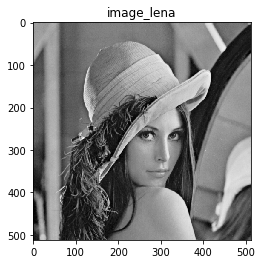

In [150]:
# 원본 이미지 호출. (0 = cv2.IMREAD_GRAYSCALE (흑백. shape 3->2))
image_lena = cv2.imread('lena.png', 0)
imshow('image_lena', image_lena)

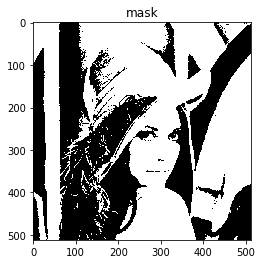

In [151]:
# 127을 기준으로 아래는 0 위는 1로 변환. threshhold(문턱값)
# thr:경계값(127), mask:이미지 tuple로 return
thr, mask = cv2.threshold(image_lena, 127, 255, cv2.THRESH_BINARY)
imshow('mask', mask)

# GaussianBlur와 threshold를 이용한 binary 구분 예시

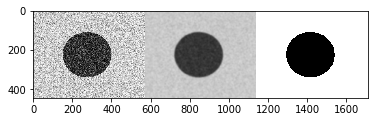

In [152]:
image_circle = cv2.imread('circle.png', 0)
img_blur = cv2.GaussianBlur(image_circle, (21,21), 0)
_, binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
imshow('', np.hstack([image_circle, img_blur, binary]))
# imshow('image', image)
# imshow('img_blur', img_blur)
# imshow('binary', binary)

# 최적의 threshold값을 어떻게 구할 수 있을까?

90


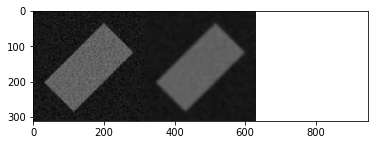

98


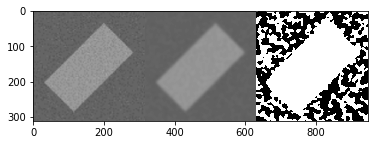

108


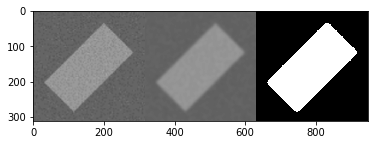

148


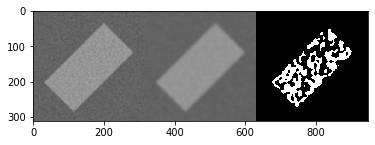

155


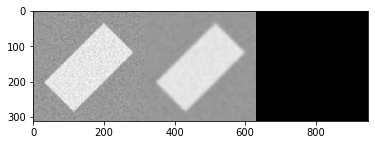

In [153]:
image_boxnoise = cv2.imread('boxnoise.png', 0)

th = [90, 98, 108, 148, 155]

for i in th :
    print(i)
    img_blur = cv2.GaussianBlur(image_boxnoise, (21,21), 0)
    _, binary = cv2.threshold(img_blur, i, 255, cv2.THRESH_BINARY)
    imshow('', np.hstack([image_boxnoise, img_blur, binary]))
# imshow('image_boxnoise', image_boxnoise)
# imshow('img_blur', img_blur)
# imshow('binary', binary)

#  THRESH_OTSU를 사용하여 자동으로 최적의 threshold값 도출
<img src='gaussian otsu.jpg' width=500>

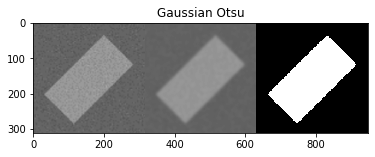

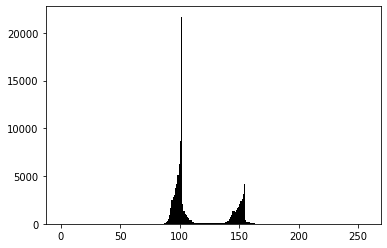

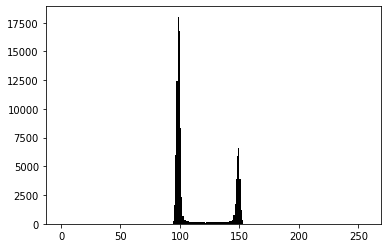

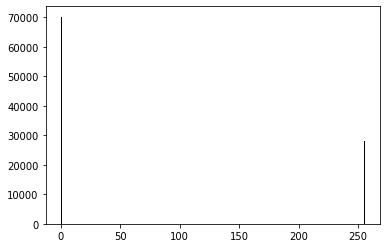

In [148]:
# THRESH_OTSU를 사용하여 자동으로 최적의 threshold값 도출
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Gaussian Otsu', np.hstack([image_boxnoise, img_blur, binary]))

# 두개의 기둥(배경, 전경) 사이의 값으로 threshold 지정
plt.hist(image_boxnoise.ravel(), 256, [0, 256], color='black')
plt.show()
plt.hist(img_blur.ravel(), 256, [0, 256], color='black')
plt.show()
plt.hist(binary.ravel(), 256, [0, 256], color='black')
plt.show()

# 일반적인 바이너리론 구분 안될 경우

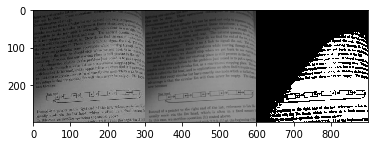

In [171]:
image_text = cv2.imread('text.jpg', 0)
img_blur = cv2.GaussianBlur(image_text, (3,3), 0)
_, binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)

imshow('', np.hstack([image_text, img_blur, binary]))
# imshow('image_text', image_text)
# imshow('img_blur', img_blur)
# imshow('binary', binary)

# adaptiveThreshold : 구역을 나눠 각각의 threshhold를 지정

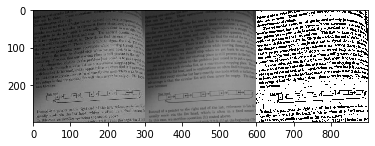

In [172]:
# img_blur = cv2.GaussianBlur(image_text, (3,3), 0)
adaptive = cv2.adaptiveThreshold(image_text, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 21, 2) # 나누는 블럭의 변의 길이, 
                                                              # 블록 안의 평균값에 추가할 가중치(+2 추가)

imshow('', np.hstack([image_text, img_blur, adaptive]))
# imshow('image_text', image_text)
# imshow('img_blur', img_blur)
# imshow('adaptive', adaptive)

In [206]:
# adaptiveThreshold 예시 2
image_text = cv2.imread('grid.jpg', 0)

# adaptiveThreshold : 구역을 나눠 각각의 threshhold를 지정
img_blur = cv2.GaussianBlur(image_text, (3,3), 0)
adaptive = cv2.adaptiveThreshold(img_blur, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 5, 3) # 나누는 블럭의 변의 길이, 
                                                              # 블록 안의 평균값에 추가할 가중치(+2 추가)

# imshow('', np.hstack([image_text, img_blur, binary]))
# imshow('image_text', image_text)
# imshow('img_blur', img_blur)
# imshow('adaptive', adaptive)
cv2.imwrite('output.jpg', adaptive)

True

<img src='output.jpg'>

# contour 예시

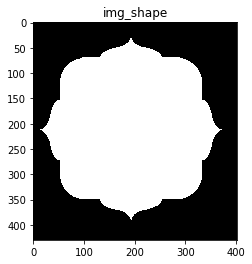

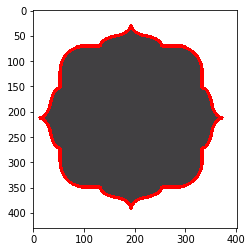

In [234]:
img_shape = cv2.imread('shape2.png')
gray = cv2.cvtColor(img_shape, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary

imshow('img_shape',binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
cv2.drawContours(img_shape, contours, -1, (0,0,255), 5) # -1:모든 값 다 찍음. 5:두께
imshow('',img_shape)

# contour 구성 분석

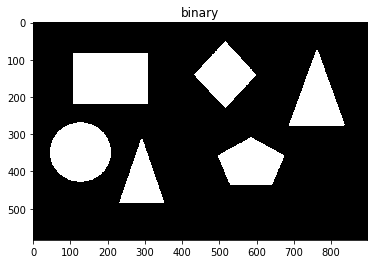

shape 개수 : 6
shape : 240
shape : 300
shape : 226
shape : 4
shape : 298
shape : 56


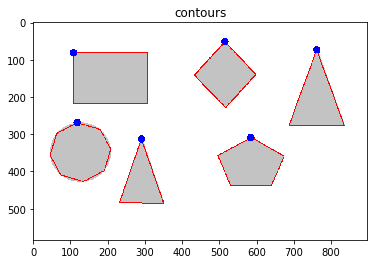

In [291]:
img_shape = cv2.imread('shape3.png')
gray = cv2.cvtColor(img_shape, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary

imshow('binary',binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL:외곽만

print(f'shape 개수 : {len(contours)}')

for con in contours :
    
    length = cv2.arcLength(con, True)
    
    approx = cv2.approxPolyDP(con, 0.02 * length, True)
    
    print(f'shape : {len(con)}')
    x=con[0][0][0]
    y=con[0][0][1]
    cv2.drawContours(img_shape, [approx], -1, (0,0,255),2)
    cv2.circle(img_shape, (x,y), 10, (255,0,0), -1) #10:원의 크기, -1:안을 채움
    
#cv2.drawContours(img_shape, contours, -1, (0,0,255), 5) # -1:모든 값 다 찍음. 5:두께
imshow('contours',img_shape)

# contour로 트럼프카드 모양 구분하기

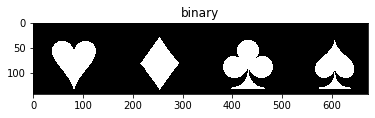

shape 개수 : 4
shape : 162, len : 325.1614673137665, approx : 8
shape : 162, len : 442.0315259695053, approx : 11
shape : 222, len : 537.2447293996811, approx : 12
shape : 109, len : 273.20309603214264, approx : 4


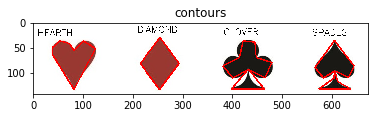

True

In [333]:
img_shape = cv2.imread('trumpcard.png')
gray = cv2.cvtColor(img_shape, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary

imshow('binary',binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL:외곽만
print(f'shape 개수 : {len(contours)}')

for con in contours :
    
    length = cv2.arcLength(con, True)  #도형 윤곽 길이, 폐곡선 여부 True
    approx = cv2.approxPolyDP(con, 0.02 * length, True) #얼마나 꺾이는지 확인
       
    print(f'shape : {len(con)}, len : {length}, approx : {len(approx)}')
    x=con[0][0][0]
    y=con[0][0][1]
    cv2.drawContours(img_shape, [approx], -1, (0,0,255),2)
    
    if len(approx) == 4:
        cv2.putText(img_shape, 'DIAMOND', (x-45, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0))
    elif len(approx) == 8:
        cv2.putText(img_shape, 'HEARTH', (x-45, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0))
    elif len(approx) == 11:
        cv2.putText(img_shape, 'SPADES', (x-45, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0))
    elif len(approx) == 12:
        cv2.putText(img_shape, 'CLOVER', (x-45, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0))

imshow('contours',img_shape)
cv2.imwrite('trumpoutput.jpg',img_shape)

# 불필요한 이미지 처리 : DILATE, ERODE, OPEN, CLOSE

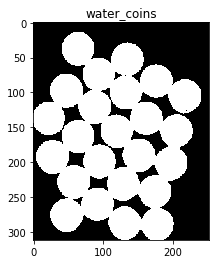

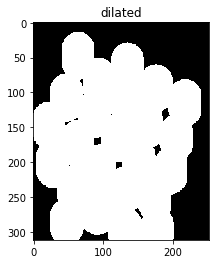

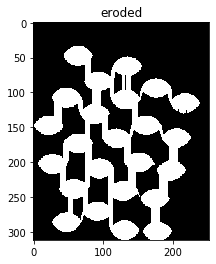

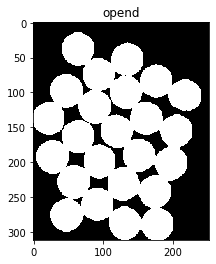

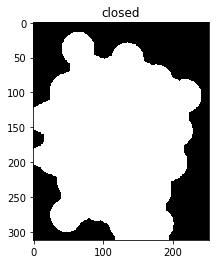

In [344]:
img_shape = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(img_shape, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = 255 - binary
imshow('water_coins',binary)

# 팽창
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3,3), iterations=20)
imshow('dilated',dilated)

# 침식
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3,3), iterations=20)
imshow('eroded',eroded)

# 오픈 : 침식 후 팽창 
opend = cv2.morphologyEx(binary, cv2.MORPH_OPEN, 
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=5)
imshow('opend',opend)

# 팽창 후 침식
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, 
                          cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=5)
imshow('closed',closed)

## DILATE, ERODE, OPEN, CLOSE 연습 : 동전 구분하기

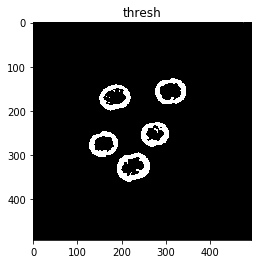

In [374]:
img_coin = cv2.imread('coin.png')
img_coin_copy = img_coin.copy()
img_gray = cv2.cvtColor(img_coin, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (7,7), 0)
thresh = cv2.adaptiveThreshold(img_blur, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 45, 6) #INV : 배경 전경 바꾸기

imshow('thresh',thresh)

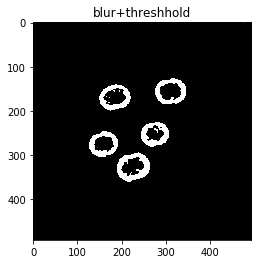

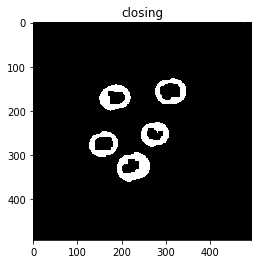

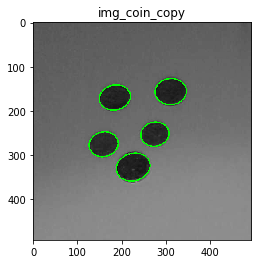

In [375]:
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
closing_copy = closing.copy()
contours, _ = cv2.findContours(closing_copy, cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)

for con in contours :
    area = cv2.contourArea(con)
    if area < 2000 or area > 4000 :     #원하는 모양(동전) 이외의 것을 제외하기 위함.
        continue
    if len(con) < 5 :      # 원의 경우 5보다 크기때문에, 그 이하 값을 제외.
        continue
    ellipse = cv2.fitEllipse(con)       #con의 점 주위에 타원을 맞추는 함수
    cv2.ellipse(img_coin_copy, ellipse, (0,255,0), 2) # (사진, 그리고자 하는 타원)
    
imshow('blur+threshhold', thresh)
imshow('closing', closing)
imshow('img_coin_copy', img_coin_copy)

## DILATE, ERODE, OPEN, CLOSE 연습 : 영수증 외곽 구분하기

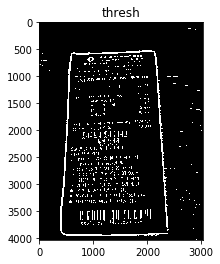

317015.5 769


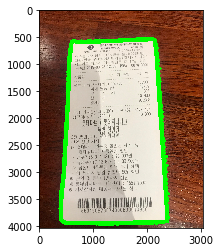

In [512]:
img_mart = cv2.imread('mart.jpg')
img_mart_copy = img_mart.copy()
img_gray = cv2.cvtColor(img_mart, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (41,41), 0)
thresh = cv2.adaptiveThreshold(img_blur, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 201, 20) #INV : 배경 전경 바꾸기

imshow('thresh', thresh)

kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
closing_copy = closing.copy()
contours, _ = cv2.findContours(closing_copy, cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)
maxarea = 0
connum = 0
i = 0
for con in contours :
    area = cv2.contourArea(con)    
    if area > maxarea : 
        maxarea = area
        connum = i
    i += 1

print(maxarea, connum)

cv2.drawContours(img_mart_copy, [contours[connum]], -1, (0,255,0),50)
imshow('', img_mart_copy)


# imshow('blur+threshhold', thresh)
# imshow('closing', closing)
# imshow('img_mart_copy', img_mart_copy)

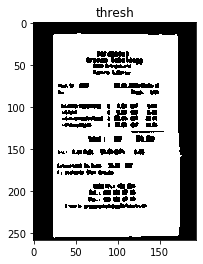

36209.0 0


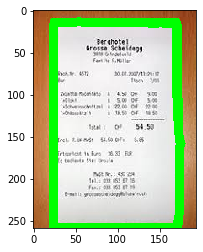

In [513]:
img_mart = cv2.imread('mart2.jpg')
img_mart_copy = img_mart.copy()
img_gray = cv2.cvtColor(img_mart, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
thresh = cv2.adaptiveThreshold(img_blur, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 151, 0) #INV : 배경 전경 바꾸기

imshow('thresh', thresh)

kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
closing_copy = closing.copy()
contours, _ = cv2.findContours(closing_copy, cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)
maxarea = 0
connum = 0
i = 0
for con in contours :
    area = cv2.contourArea(con)    
    if area > maxarea : 
        maxarea = area
        connum = i
    i += 1

print(maxarea, connum)

cv2.drawContours(img_mart_copy, [contours[connum]], -1, (0,255,0),10)
imshow('', img_mart_copy)


# imshow('blur+threshhold', thresh)
# imshow('closing', closing)
# imshow('img_mart_copy', img_mart_copy)